# Classification models - Mai Anh Bui

Author: Mai Anh Bui



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_excel('CCIHE2018-PublicDataFile.xlsx',sheet_name='Data')  
data = data.loc[(data.BASIC2018 == 15) | (data.BASIC2018 == 16)]
data['class']=data['BASIC2018']

In [4]:
data
#data.shape

,UNITID,NAME,CITY,STABBR,CC2000,BASIC2005,BASIC2010,BASIC2015,BASIC2018,IPUG2018,...,NSAT,NACT,NSATACT,SATV25,SATM25,SATCMB25,SATACTEQ25,ACTCMP25,ACTFINAL,class
29,200697,Air Force Institute of Technology-Graduate Sch...,Wright-Patterson AFB,OH,59,-3,17,17,16,0,...,0,0,0,0,0,0,0,0,0.000000,16
118,131159,American University,Washington,DC,15,17,17,16,16,11,...,881,693,1574,610,570,1180,24,26,24.880559,16
192,448886,Arizona State University-Downtown Phoenix,Phoenix,AZ,-3,-3,-3,17,16,20,...,629,922,1551,540,530,1070,21,21,21.000000,16
194,483124,Arizona State University-Skysong,Scottsdale,AZ,-3,-3,-3,17,16,13,...,0,0,0,0,0,0,0,0,0.000000,16
195,104151,Arizona State University-Tempe,Tempe,AZ,15,15,15,15,15,14,...,4284,4796,9080,560,560,1120,22,22,22.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,156125,Wichita State University,Wichita,KS,16,16,16,16,16,17,...,88,1420,1508,500,500,1000,19,20,19.941645,16
4276,168421,Worcester Polytechnic Institute,Worcester,MA,16,17,17,16,16,17,...,0,0,0,0,0,0,0,0,0.000000,16
4284,206604,Wright State University-Main Campus,Dayton,OH,16,16,16,17,16,16,...,227,2117,2344,490,490,980,18,19,18.903157,16
4292,130794,Yale University,New Haven,CT,15,15,15,15,15,8,...,967,907,1874,730,730,1460,33,32,32.516009,15


## List of features


In [3]:
X_train = data.loc[:,['ACTCAT','ACTFINAL','ANENR1617','OBEREG','DOCOTHDEG',
                      'DOCPPDEG','DOCRESFLAG','DOCRSDEG','DRSA&S','DRSPROF',
                      'FACNUM','NSAT','PDNFRSTAFF','S&ER&D','NONS&ER&D',
                      'HUM_RSD','SOCSC_RSD','STEM_RSD','OTHER_RSD','TOTDEG']]
y_train = data.loc[:,'class']


In [4]:
feature_table = {'Feature': X_train.columns}
feature_table_df = pd.DataFrame(feature_table, columns = ['Feature'])
print (feature_table_df)

       Feature
0       ACTCAT
1     ACTFINAL
2    ANENR1617
3       OBEREG
4    DOCOTHDEG
5     DOCPPDEG
6   DOCRESFLAG
7     DOCRSDEG
8       DRSA&S
9      DRSPROF
10      FACNUM
11        NSAT
12  PDNFRSTAFF
13      S&ER&D
14   NONS&ER&D
15     HUM_RSD
16   SOCSC_RSD
17    STEM_RSD
18   OTHER_RSD
19      TOTDEG


# Decision tree

In [5]:
X_train_dt = X_train.replace(np.nan,0)
y_train_dt = y_train.replace(np.nan,0)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01456
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.81156
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.09438
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.06046
Feature: 15, Score: 0.01904
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


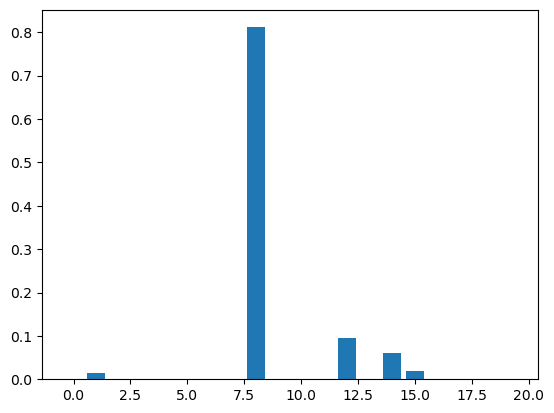

In [6]:
model_dt = DecisionTreeClassifier()
# fit the model
model_dt.fit(X_train_dt, y_train_dt)
# get importance
dt_importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(dt_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(dt_importance))], dt_importance)
pyplot.show()



In [9]:
fn=['ACTCAT','ACTFINAL','ANENR1617','OBEREG','DOCOTHDEG',
                      'DOCPPDEG','DOCRESFLAG','DOCRSDEG','DRSA&S','DRSPROF',
                      'FACNUM','NSAT','PDNFRSTAFF','S&ER&D','NONS&ER&D',
                      'HUM_RSD','SOCSC_RSD','STEM_RSD','OTHER_RSD','TOTDEG']
cn=['R1', 'R2']
fig, axes = pyplot.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

## Random forest

Decision tree method classifies the dependent variables into different categories using input features. Gini impurity measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. We can use Gini impurity index to form a loss function as the sum of the Gini indices of the two nodes.

The random forest method improves on the decision tree method by including multiple trees and de-correlating the trees:

-	Build several decision trees on bootstrapped training samples
-	Each time a split in the tree is considered, a random sample of m predictors is chosen


Feature: 0, Score: 0.00284
Feature: 1, Score: 0.01642
Feature: 2, Score: 0.00544
Feature: 3, Score: 0.00438
Feature: 4, Score: 0.00015
Feature: 5, Score: 0.00831
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.09284
Feature: 8, Score: 0.24681
Feature: 9, Score: 0.00500
Feature: 10, Score: 0.10825
Feature: 11, Score: 0.00468
Feature: 12, Score: 0.07127
Feature: 13, Score: 0.10022
Feature: 14, Score: 0.06155
Feature: 15, Score: 0.02583
Feature: 16, Score: 0.04155
Feature: 17, Score: 0.16327
Feature: 18, Score: 0.00518
Feature: 19, Score: 0.03602


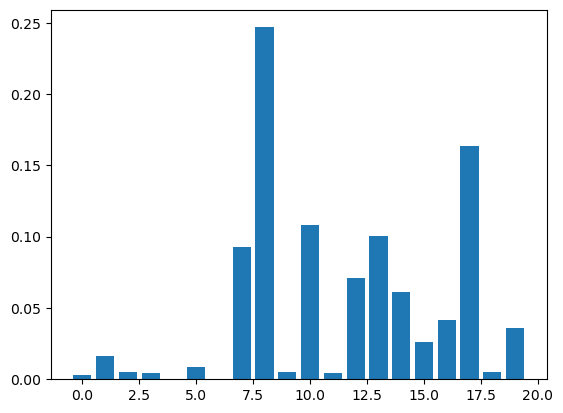

In [7]:
model_rf = RandomForestClassifier()
# fit the model
model_rf.fit(X_train_dt, y_train_dt)
# get importance
RF_importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(RF_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(RF_importance))], RF_importance)
pyplot.show()


In [11]:
RF_table = {'RF importance': RF_importance}

RF_table_df = pd.DataFrame(RF_table, columns = ['RF importance'])

print (RF_table_df)

    RF importance
0        0.005342
1        0.016555
2        0.009826
3        0.004912
4        0.000000
5        0.004770
6        0.000000
7        0.133723
8        0.225334
9        0.006503
10       0.041128
11       0.006156
12       0.107338
13       0.118593
14       0.063121
15       0.030287
16       0.045393
17       0.154526
18       0.007064
19       0.019426


## XGBoost

The model is an implementation of gradient boosted decision trees. The method learns one model at a time and uses the previous model’s results when learning the new model. The model adjusts the weights and updates accordingly after each learning round.

[11:44:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01038
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05047
Feature: 8, Score: 0.66738
Feature: 9, Score: 0.05374
Feature: 10, Score: 0.01072
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.05744
Feature: 13, Score: 0.06729
Feature: 14, Score: 0.04755
Feature: 15, Score: 0.01972
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01374
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00156


C:\Users\mbui\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


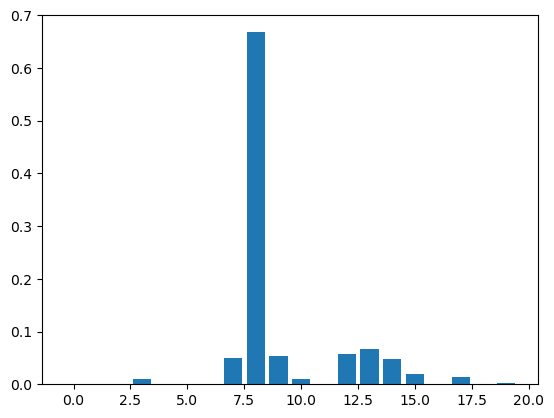

In [12]:
model_xg = XGBClassifier()
# fit the model
model_xg.fit(X_train, y_train)
# get importance
XG_importance = model_xg.feature_importances_
# summarize feature importance
for i,v in enumerate(XG_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(XG_importance))], XG_importance)
pyplot.show()

In [13]:
XG_table = {'XG importance': XG_importance}

XG_table_df = pd.DataFrame(XG_table, columns = ['XG importance'])

print (XG_table_df)

    XG importance
0        0.000000
1        0.000000
2        0.000000
3        0.010383
4        0.000000
5        0.000000
6        0.000000
7        0.050471
8        0.667384
9        0.053744
10       0.010720
11       0.000000
12       0.057439
13       0.067287
14       0.047549
15       0.019724
16       0.000000
17       0.013740
18       0.000000
19       0.001559


In [14]:
table = {'Feature': X_train.columns,'Decision tree': dt_importance, 'Random forest': RF_importance,'XGBoost': XG_importance}

table_df = pd.DataFrame(table, columns = ['Feature','Decision tree', 'Random forest','XGBoost']).sort_values(by=['Decision tree','Random forest','XGBoost'],ascending=False)

print (table_df)
table_df.to_csv(r'feature_importance.csv', index = True, header=True)

       Feature  Decision tree  Random forest   XGBoost
8       DRSA&S       0.812142       0.225334  0.667384
12  PDNFRSTAFF       0.094382       0.107338  0.057439
14   NONS&ER&D       0.078918       0.063121  0.047549
1     ACTFINAL       0.014558       0.016555  0.000000
17    STEM_RSD       0.000000       0.154526  0.013740
7     DOCRSDEG       0.000000       0.133723  0.050471
13      S&ER&D       0.000000       0.118593  0.067287
16   SOCSC_RSD       0.000000       0.045393  0.000000
10      FACNUM       0.000000       0.041128  0.010720
15     HUM_RSD       0.000000       0.030287  0.019724
19      TOTDEG       0.000000       0.019426  0.001559
2    ANENR1617       0.000000       0.009826  0.000000
18   OTHER_RSD       0.000000       0.007064  0.000000
9      DRSPROF       0.000000       0.006503  0.053744
11        NSAT       0.000000       0.006156  0.000000
0       ACTCAT       0.000000       0.005342  0.000000
3       OBEREG       0.000000       0.004912  0.010383
5     DOCP

# Model evaluation

In [14]:
data_test = pd.read_excel('CCIHE2021-PublicData.xlsx',sheet_name='Data')  
data_test = data_test.loc[(data_test.basic2021 == 15) | (data_test.basic2021 == 16)]
data_test['class']=data_test['basic2021']
data_test.shape

(279, 102)

In [9]:
X_test = data_test.loc[:,[word.lower() for word in ['SELINDEX','ACTFINAL','ANENR1920','OBEREG','DOCOTHDEG',
                      'DOCPPDEG','DOCRESFLAG','DOCRSDEG','DRSAS','DRSPROF',
                      'FACNUM','NSAT','PDNFRSTAFF','SERD','NONSERD',
                      'HUM_RSD','SOCSC_RSD','STEM_RSD','OTH_RSD','TOTDEG']]]
X_test.columns =[['ACTCAT','ACTFINAL','ANENR1617','OBEREG','DOCOTHDEG',
                      'DOCPPDEG','DOCRESFLAG','DOCRSDEG','DRSA&S','DRSPROF',
                      'FACNUM','NSAT','PDNFRSTAFF','S&ER&D','NONS&ER&D',
                      'HUM_RSD','SOCSC_RSD','STEM_RSD','OTHER_RSD','TOTDEG']]
y_test = data_test.loc[:,'class']

In [15]:
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xg = model_xg.predict(X_test)
table = {'Decision tree': y_pred_dt, 'Random forest': y_pred_rf,'XGBoost': y_pred_xg}
table_df = pd.DataFrame(table, columns = ['Decision tree', 'Random forest','XGBoost'])
table_df.loc[table_df['Decision tree']!=table_df['Random forest']]


,Decision tree,Random forest,XGBoost
28,15,16,15
34,15,16,15
76,15,16,15
93,15,16,15
97,15,16,15
102,16,15,16
161,16,15,15
194,15,16,16
205,15,16,15
207,15,16,15


In [18]:
#Only 8 out of 279 variables have different predictions, less than 3 percent. 
#All three models have accuracy rate up to 95 percent, with the highest accuracy rate in the XGBoost method of about 96 percent


In [16]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt)
accuracy_rf = metrics.accuracy_score(y_test,y_pred_rf)
accuracy_xg = metrics.accuracy_score(y_test,y_pred_xg)
accuracy_rf

0.942652329749104